In [ ]:
## Write the code to build a model for FashionMNist.
#Expected accuracy for Test >90
# CV accuracy>90
#Training Accuracy>90
#If CV accuracy < 90 please take care by using dropouts

In [1]:
import keras
import keras.datasets
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from keras.utils import to_categorical

Using TensorFlow backend.


In [35]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split

In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [37]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape( -1, 28,28,1)
x_test = x_test.reshape( -1, 28,28,1)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(x_train.shape, x_test.shape, y_train_hot.shape, y_test_hot.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [47]:
batch_size = 128
epochs = 25
num_classes = 10

In [58]:
def BuildModel1(input_shape=(28,28,1), convSize=(3,3), PoolSize=(2,2)):
    modelFM = Sequential()
    modelFM.add(Conv2D(20, kernel_size=convSize,
                       activation='linear',
                       input_shape=input_shape,padding="same"))
    modelFM.add(LeakyReLU(alpha=0.2))
    modelFM.add(MaxPooling2D(20,(2, 2),padding='same'))

    modelFM.add(Conv2D(45, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.3))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.3))

    modelFM.add(Conv2D(50, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.4))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.4))

    modelFM.add(Flatten())
    modelFM.add(Dense(100, activation='linear'))
    modelFM.add(LeakyReLU(alpha=0.5))
    modelFM.add(Dropout(0.4))
    modelFM.add(Dense(num_classes, activation='softmax'))
   

  
  

 
    return modelFM

In [59]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 45)          0         
__________

In [ ]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/30
8294/8294 [==============================] - 128s 15ms/step - loss: 1.7334 - acc: 0.3832 - val_loss: 0.9904 - val_acc: 0.6586
Epoch 2/30
8294/8294 [==============================] - 128s 15ms/step - loss: 0.9342 - acc: 0.6658 - val_loss: 0.7025 - val_acc: 0.7420
Epoch 3/30
8294/8294 [==============================] - 126s 15ms/step - loss: 0.7485 - acc: 0.7237 - val_loss: 0.6374 - val_acc: 0.7560
Epoch 4/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.6707 - acc: 0.7503 - val_loss: 0.5757 - val_acc: 0.7806
Epoch 5/30
8294/8294 [==============================] - 126s 15ms/step - loss: 0.6256 - acc: 0.7731 - val_loss: 0.5431 - val_acc: 0.7859
Epoch 6/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5915 - acc: 0.7788 - val_loss: 0.5206 - val_acc: 0.7960
Epoch 7/30
8294/8294 [==============================] - 128s 15ms/step - loss: 0.5625 - acc: 0.7954 - val_loss: 0.5150 - val_acc: 

In [ ]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
predicted_classes = modelFM.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
image = [ x_test[100, :].reshape((28, 28)), x_test[1000, :].reshape((28, 28)),x_test[6000, :].reshape((28, 28))]
actualLable = [ y_test[100], y_test[1000],y_test[6000]]
predicted=[ predicted_classes[100], predicted_classes[1000],predicted_classes[6000]]


for im,y,py in zip(image,actualLable,predicted):
    
    plt.imshow(im)
    plt.show()
    print("Actual is  {0} predicted is {1}".format(y,py))

                                

In [41]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 45)          0         
__________

In [42]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/30
8294/8294 [==============================] - 129s 16ms/step - loss: 1.2863 - acc: 0.5301 - val_loss: 0.7725 - val_acc: 0.7155
Epoch 2/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.7399 - acc: 0.7188 - val_loss: 0.6076 - val_acc: 0.7777
Epoch 3/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.6459 - acc: 0.7618 - val_loss: 0.5504 - val_acc: 0.7941
Epoch 4/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5852 - acc: 0.7848 - val_loss: 0.5033 - val_acc: 0.8105
Epoch 5/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5512 - acc: 0.7976 - val_loss: 0.4764 - val_acc: 0.8187
Epoch 6/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5123 - acc: 0.8128 - val_loss: 0.4462 - val_acc: 0.8303
Epoch 7/30
8294/8294 [==============================] - 127s 15ms/step - loss: 0.4955 - acc: 0.8149 - val_loss: 0.4290 - val_acc: 

In [43]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 0.3976375576019287
Test accuracy: 0.8624


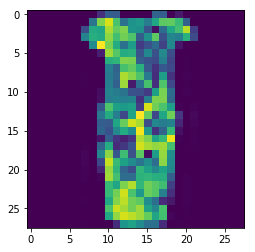

Actual is  3 predicted is 3


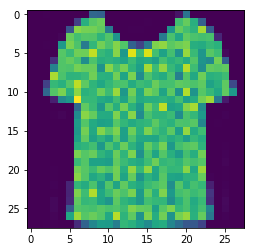

Actual is  0 predicted is 6


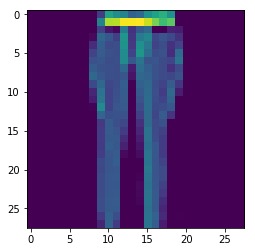

Actual is  1 predicted is 1


In [44]:
predicted_classes = modelFM.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
image = [ x_test[100, :].reshape((28, 28)), x_test[1000, :].reshape((28, 28)),x_test[6000, :].reshape((28, 28))]
actualLable = [ y_test[100], y_test[1000],y_test[6000]]
predicted=[ predicted_classes[100], predicted_classes[1000],predicted_classes[6000]]


for im,y,py in zip(image,actualLable,predicted):
    
    plt.imshow(im)
    plt.show()
    print("Actual is  {0} predicted is {1}".format(y,py))

                                

In [28]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 45)          0         
__________

In [29]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/25
8294/8294 [==============================] - 128s 15ms/step - loss: 1.3918 - acc: 0.4995 - val_loss: 0.7401 - val_acc: 0.7314
Epoch 2/25
8294/8294 [==============================] - 129s 15ms/step - loss: 0.7073 - acc: 0.7404 - val_loss: 0.6375 - val_acc: 0.7652
Epoch 3/25
8294/8294 [==============================] - 127s 15ms/step - loss: 0.6150 - acc: 0.7724 - val_loss: 0.5440 - val_acc: 0.7975
Epoch 4/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.5618 - acc: 0.7898 - val_loss: 0.5288 - val_acc: 0.8091
Epoch 5/25
8294/8294 [==============================] - 126s 15ms/step - loss: 0.5200 - acc: 0.8124 - val_loss: 0.4964 - val_acc: 0.8255
Epoch 6/25
8294/8294 [==============================] - 127s 15ms/step - loss: 0.4906 - acc: 0.8201 - val_loss: 0.4962 - val_acc: 0.8120
Epoch 7/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4646 - acc: 0.8328 - val_loss: 0.4452 - val_acc: 

In [30]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 0.38586035887002945
Test accuracy: 0.863


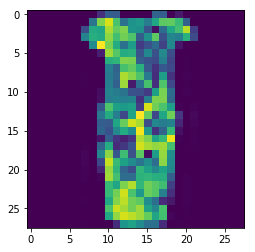

Actual is  3 predicted is 3


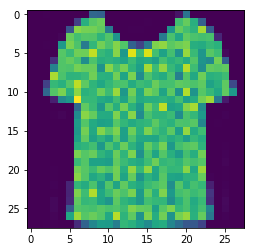

Actual is  0 predicted is 6


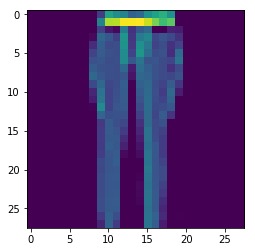

Actual is  1 predicted is 1


In [31]:
predicted_classes = modelFM.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
image = [ x_test[100, :].reshape((28, 28)), x_test[1000, :].reshape((28, 28)),x_test[6000, :].reshape((28, 28))]
actualLable = [ y_test[100], y_test[1000],y_test[6000]]
predicted=[ predicted_classes[100], predicted_classes[1000],predicted_classes[6000]]


for im,y,py in zip(image,actualLable,predicted):
    
    plt.imshow(im)
    plt.show()
    print("Actual is  {0} predicted is {1}".format(y,py))

                                

In [14]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 45)          0         
__________

In [15]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/25
8294/8294 [==============================] - 131s 16ms/step - loss: 1.2201 - acc: 0.5694 - val_loss: 0.7114 - val_acc: 0.7377
Epoch 2/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.6701 - acc: 0.7528 - val_loss: 0.6035 - val_acc: 0.7700
Epoch 3/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.5679 - acc: 0.7882 - val_loss: 0.5487 - val_acc: 0.7907
Epoch 4/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.5301 - acc: 0.8066 - val_loss: 0.5252 - val_acc: 0.8038
Epoch 5/25
8294/8294 [==============================] - 129s 16ms/step - loss: 0.5035 - acc: 0.8122 - val_loss: 0.4869 - val_acc: 0.8115
Epoch 6/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4677 - acc: 0.8271 - val_loss: 0.4730 - val_acc: 0.8216
Epoch 7/25
8294/8294 [==============================] - 129s 16ms/step - loss: 0.4489 - acc: 0.8384 - val_loss: 0.4457 - val_acc: 

In [16]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 0.45338255281448364
Test accuracy: 0.8473


In [10]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 45)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 50)          20300     
__________

In [11]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/25
8294/8294 [==============================] - 127s 15ms/step - loss: 1.2720 - acc: 0.5464 - val_loss: 0.8595 - val_acc: 0.6683
Epoch 2/25
8294/8294 [==============================] - 127s 15ms/step - loss: 0.6762 - acc: 0.7538 - val_loss: 0.6048 - val_acc: 0.7695
Epoch 3/25
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5589 - acc: 0.8009 - val_loss: 0.5192 - val_acc: 0.8057
Epoch 4/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4960 - acc: 0.8223 - val_loss: 0.5170 - val_acc: 0.8081
Epoch 5/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4685 - acc: 0.8333 - val_loss: 0.5017 - val_acc: 0.8057
Epoch 6/25
8294/8294 [==============================] - 127s 15ms/step - loss: 0.4370 - acc: 0.8430 - val_loss: 0.4630 - val_acc: 0.8269
Epoch 7/25
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4224 - acc: 0.8480 - val_loss: 0.4414 - val_acc: 

In [12]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 0.4887313248872757
Test accuracy: 0.8481


In [40]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 45)          0         
__________

In [41]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=64,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/20
8294/8294 [==============================] - 132s 16ms/step - loss: 1.2043 - acc: 0.5694 - val_loss: 0.7100 - val_acc: 0.7281
Epoch 2/20
8294/8294 [==============================] - 130s 16ms/step - loss: 0.6667 - acc: 0.7528 - val_loss: 0.5947 - val_acc: 0.7835
Epoch 3/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.5569 - acc: 0.7950 - val_loss: 0.5243 - val_acc: 0.8057
Epoch 4/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.5011 - acc: 0.8141 - val_loss: 0.5154 - val_acc: 0.8062
Epoch 5/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.4722 - acc: 0.8258 - val_loss: 0.4617 - val_acc: 0.8303
Epoch 6/20
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4439 - acc: 0.8390 - val_loss: 0.4551 - val_acc: 0.8332
Epoch 7/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.4203 - acc: 0.8484 - val_loss: 0.4593 - val_acc: 

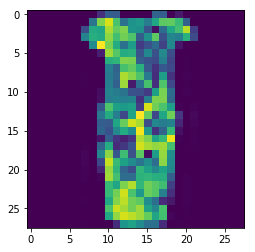

Actual is  3 predicted is 3


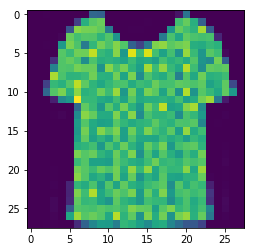

Actual is  0 predicted is 6


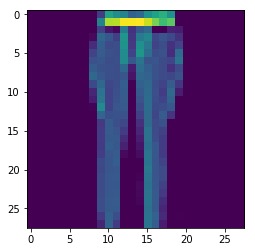

Actual is  1 predicted is 1


In [42]:
predicted_classes = modelFM.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
image = [ x_test[100, :].reshape((28, 28)), x_test[1000, :].reshape((28, 28)),x_test[6000, :].reshape((28, 28))]
actualLable = [ y_test[100], y_test[1000],y_test[6000]]
predicted=[ predicted_classes[100], predicted_classes[1000],predicted_classes[6000]]


for im,y,py in zip(image,actualLable,predicted):
    
    plt.imshow(im)
    plt.show()
    print("Actual is  {0} predicted is {1}".format(y,py))

                                

In [43]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 45)          0         
__________

In [22]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 50)          20300     
__________

In [23]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=64,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/20
8294/8294 [==============================] - 132s 16ms/step - loss: 1.2057 - acc: 0.5691 - val_loss: 0.7379 - val_acc: 0.7165
Epoch 2/20
8294/8294 [==============================] - 130s 16ms/step - loss: 0.6644 - acc: 0.7469 - val_loss: 0.5854 - val_acc: 0.7888
Epoch 3/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.5741 - acc: 0.7853 - val_loss: 0.5508 - val_acc: 0.7980
Epoch 4/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.5062 - acc: 0.8128 - val_loss: 0.5506 - val_acc: 0.7883
Epoch 5/20
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4699 - acc: 0.8257 - val_loss: 0.5080 - val_acc: 0.7965
Epoch 6/20
8294/8294 [==============================] - 128s 15ms/step - loss: 0.4413 - acc: 0.8366 - val_loss: 0.4454 - val_acc: 0.8279
Epoch 7/20
8294/8294 [==============================] - 129s 16ms/step - loss: 0.4096 - acc: 0.8484 - val_loss: 0.4353 - val_acc: 

In [24]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 0.3988493313550949
Test accuracy: 0.8596


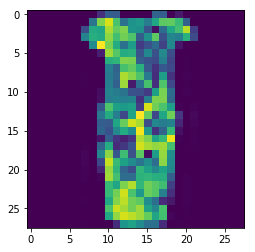

Actual is  3 predicted is 3


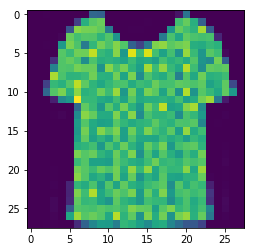

Actual is  0 predicted is 6


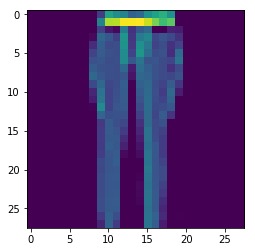

Actual is  1 predicted is 1


In [26]:
predicted_classes = modelFM.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
image = [ x_test[100, :].reshape((28, 28)), x_test[1000, :].reshape((28, 28)),x_test[6000, :].reshape((28, 28))]
actualLable = [ y_test[100], y_test[1000],y_test[6000]]
predicted=[ predicted_classes[100], predicted_classes[1000],predicted_classes[6000]]


for im,y,py in zip(image,actualLable,predicted):
    
    plt.imshow(im)
    plt.show()
    print("Actual is  {0} predicted is {1}".format(y,py))

                                

In [50]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train1 = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=64,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/20
8294/8294 [==============================] - 128s 15ms/step - loss: 1.3376 - acc: 0.5112 - val_loss: 0.7986 - val_acc: 0.7030
Epoch 2/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.7418 - acc: 0.7144 - val_loss: 0.6211 - val_acc: 0.7647
Epoch 3/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.6364 - acc: 0.7543 - val_loss: 0.5761 - val_acc: 0.7830
Epoch 4/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.5770 - acc: 0.7836 - val_loss: 0.5332 - val_acc: 0.7946
Epoch 5/20
8294/8294 [==============================] - 125s 15ms/step - loss: 0.5404 - acc: 0.7952 - val_loss: 0.5002 - val_acc: 0.8057
Epoch 6/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.5102 - acc: 0.8044 - val_loss: 0.4661 - val_acc: 0.8284
Epoch 7/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.4944 - acc: 0.8167 - val_loss: 0.4879 - val_acc: 

In [67]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 52s 5ms/step
Test loss: 0.39750172464847566
Test accuracy: 0.8567


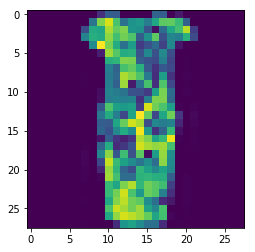

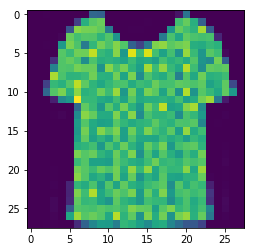

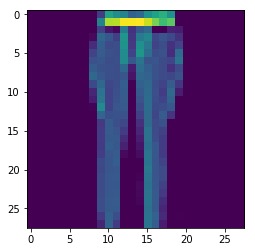

In [54]:
image = [ x_test[100, :].reshape((28, 28)), x_test[1000, :].reshape((28, 28)),x_test[6000, :].reshape((28, 28))]

for im in image:
    
    plt.imshow(im)
    plt.show()

In [55]:
predicted_classes = modelFM1.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)




In [66]:
#y_train[100]

1

In [64]:
modelFM1 = BuildModel1()
modelFM1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])
modelFM1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 45)          0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 7, 7, 45)          0         
__________

In [38]:
model_train = modelFM1.fit(tr_xxx2, tr_yxx2, batch_size=64,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/20
8294/8294 [==============================] - 128s 15ms/step - loss: 1.4637 - acc: 0.4643 - val_loss: 1.0604 - val_acc: 0.6365
Epoch 2/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.8657 - acc: 0.6821 - val_loss: 0.7535 - val_acc: 0.7401
Epoch 3/20
8294/8294 [==============================] - 127s 15ms/step - loss: 0.7133 - acc: 0.7298 - val_loss: 0.6687 - val_acc: 0.7700
Epoch 4/20
8294/8294 [==============================] - 126s 15ms/step - loss: 0.6410 - acc: 0.7593 - val_loss: 0.6121 - val_acc: 0.7864
Epoch 5/20
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5868 - acc: 0.7763 - val_loss: 0.5910 - val_acc: 0.7830
Epoch 6/20
8294/8294 [==============================] - 128s 15ms/step - loss: 0.5561 - acc: 0.7948 - val_loss: 0.5758 - val_acc: 0.7830
Epoch 7/20
8294/8294 [==============================] - 127s 15ms/step - loss: 0.5317 - acc: 0.8053 - val_loss: 0.5746 - val_acc: 

In [41]:
predicted_classes = modelFM1.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


                                

In [40]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM1.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 51s 5ms/step
Test loss: 0.43351403579711917
Test accuracy: 0.8394


In [6]:
def BuildModel1(input_shape=(28,28,1), convSize=(3,3), PoolSize=(2,2)):
    modelFM = Sequential()
    modelFM.add(Conv2D(20, kernel_size=convSize,
                       activation='linear',
                       input_shape=input_shape,padding="same"))
    modelFM.add(LeakyReLU(alpha=0.01))
    modelFM.add(MaxPooling2D(20,(2, 2),padding='same'))
    modelFM.add(Dropout(0.1))

    modelFM.add(Conv2D(45, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.001))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.3))

    modelFM.add(Conv2D(50, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.3))

    modelFM.add(Flatten())
    modelFM.add(Dense(100, activation='linear'))
    modelFM.add(LeakyReLU(alpha=0.001))
    modelFM.add(Dense(num_classes, activation='softmax'))
  
  

 
    return modelFM

In [14]:
modelFM = BuildModel1()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 45)          0         
__________

In [9]:
#predicted_classes = modelFM1.predict(x_test)

In [13]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.2832 - acc: 0.8938 - val_loss: 0.3469 - val_acc: 0.8751
Epoch 2/140
8294/8294 [==============================] - 118s 14ms/step - loss: 0.2800 - acc: 0.8945 - val_loss: 0.3444 - val_acc: 0.8732
Epoch 3/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.2780 - acc: 0.8953 - val_loss: 0.3419 - val_acc: 0.8722
Epoch 4/140
8294/8294 [==============================] - 118s 14ms/step - loss: 0.2719 - acc: 0.8987 - val_loss: 0.3422 - val_acc: 0.8722
Epoch 5/140
8294/8294 [==============================] - 119s 14ms/step - loss: 0.2790 - acc: 0.8926 - val_loss: 0.3434 - val_acc: 0.8669
Epoch 6/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.2673 - acc: 0.8996 - val_loss: 0.3437 - val_acc: 0.8684
Epoch 7/140
8294/8294 [==============================] - 118s 14ms/step - loss: 0.2727 - acc: 0.8951 - val_loss: 0.3400 - va

Epoch 118/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.1426 - acc: 0.9460 - val_loss: 0.3771 - val_acc: 0.8746
Epoch 119/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.1474 - acc: 0.9426 - val_loss: 0.3863 - val_acc: 0.8761
Epoch 120/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.1451 - acc: 0.9467 - val_loss: 0.3807 - val_acc: 0.8756
Epoch 121/140
8294/8294 [==============================] - 116s 14ms/step - loss: 0.1405 - acc: 0.9480 - val_loss: 0.3748 - val_acc: 0.8780
Epoch 122/140
8294/8294 [==============================] - 117s 14ms/step - loss: 0.1478 - acc: 0.9441 - val_loss: 0.3822 - val_acc: 0.8790
Epoch 123/140
8294/8294 [==============================] - 116s 14ms/step - loss: 0.1396 - acc: 0.9462 - val_loss: 0.3804 - val_acc: 0.8814
Epoch 124/140
8294/8294 [==============================] - 116s 14ms/step - loss: 0.1404 - acc: 0.9482 - val_loss: 0.3817 - val_acc: 0.8722
Epoch 125/140
8294/8

In [14]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 49s 5ms/step
Test loss: 0.4464316241085529
Test accuracy: 0.8638


In [48]:
batch_size = 32
epochs = 80
num_classes = 10

In [53]:
def BuildModel2(input_shape=(28,28,1), convSize=(3,3), PoolSize=(2,2)):
    modelFM = Sequential()
    modelFM.add(Conv2D(20, kernel_size=convSize,
                       activation='linear',
                       input_shape=input_shape,padding="same"))
    modelFM.add(LeakyReLU(alpha=0.01))
    modelFM.add(MaxPooling2D(20,(2, 2),padding='same'))
    modelFM.add(Dropout(0.25))

    modelFM.add(Conv2D(45, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.3))

    modelFM.add(Conv2D(50, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.4))

    modelFM.add(Flatten())
    modelFM.add(Dense(100, activation='linear'))
    modelFM.add(LeakyReLU(alpha=0.01))
    modelFM.add(Dropout(0.4))

    modelFM.add(Dense(num_classes, activation='softmax'))
  
  

 
    return modelFM

In [50]:
modelFM = BuildModel2()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 45)          0         
__________

In [51]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/80
8294/8294 [==============================] - 129s 16ms/step - loss: 1.5499 - acc: 0.4172 - val_loss: 0.8747 - val_acc: 0.7025
Epoch 2/80
8294/8294 [==============================] - 127s 15ms/step - loss: 0.8578 - acc: 0.6813 - val_loss: 0.7095 - val_acc: 0.7493
Epoch 3/80
8294/8294 [==============================] - 127s 15ms/step - loss: 0.7360 - acc: 0.7194 - val_loss: 0.6580 - val_acc: 0.7599
Epoch 4/80
8294/8294 [==============================] - 126s 15ms/step - loss: 0.6777 - acc: 0.7408 - val_loss: 0.5662 - val_acc: 0.7878
Epoch 5/80
8294/8294 [==============================] - 127s 15ms/step - loss: 0.6357 - acc: 0.7598 - val_loss: 0.5769 - val_acc: 0.7840
Epoch 6/80
8294/8294 [==============================] - 127s 15ms/step - loss: 0.6012 - acc: 0.7744 - val_loss: 0.5324 - val_acc: 0.7994
Epoch 7/80
8294/8294 [==============================] - 126s 15ms/step - loss: 0.5857 - acc: 0.7831 - val_loss: 0.4865 - val_acc: 

8294/8294 [==============================] - 128s 15ms/step - loss: 0.3141 - acc: 0.8834 - val_loss: 0.3438 - val_acc: 0.8679
Epoch 61/80
8294/8294 [==============================] - 128s 15ms/step - loss: 0.3098 - acc: 0.8785 - val_loss: 0.3503 - val_acc: 0.8674
Epoch 62/80
8294/8294 [==============================] - 128s 15ms/step - loss: 0.3119 - acc: 0.8798 - val_loss: 0.3588 - val_acc: 0.8674
Epoch 63/80
8294/8294 [==============================] - 128s 15ms/step - loss: 0.3178 - acc: 0.8776 - val_loss: 0.3578 - val_acc: 0.8737
Epoch 64/80
8294/8294 [==============================] - 127s 15ms/step - loss: 0.3145 - acc: 0.8787 - val_loss: 0.3696 - val_acc: 0.8640
Epoch 65/80
8294/8294 [==============================] - 127s 15ms/step - loss: 0.3027 - acc: 0.8814 - val_loss: 0.3605 - val_acc: 0.8660
Epoch 66/80
8294/8294 [==============================] - 128s 15ms/step - loss: 0.2961 - acc: 0.8857 - val_loss: 0.3879 - val_acc: 0.8631
Epoch 67/80
8294/8294 [=======================

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [52]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 49s 5ms/step
Test loss: 0.41245015701055526
Test accuracy: 0.8574


In [6]:
def BuildModel3(input_shape=(28,28,1), convSize=(3,3), PoolSize=(2,2)):
    modelFM = Sequential()
    modelFM.add(Conv2D(20, kernel_size=convSize,
                       activation='linear',
                       input_shape=input_shape,padding="same"))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(20,(2, 2),padding='same'))
    modelFM.add(Dropout(0.25))

    modelFM.add(Conv2D(45, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.3))

    modelFM.add(Conv2D(50, convSize, 
                       activation='linear',
                       padding='same'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(MaxPooling2D(pool_size=PoolSize,padding='same'))
    modelFM.add(Dropout(0.4))

    modelFM.add(Flatten())
    modelFM.add(Dense(100, activation='linear'))
    modelFM.add(LeakyReLU(alpha=0.1))
    modelFM.add(Dropout(0.3))

    modelFM.add(Dense(num_classes, activation='softmax'))
  
  

 
    return modelFM

In [7]:
batch_size = 32
epochs = 240
num_classes = 10

In [8]:
modelFM = BuildModel3()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 45)          0         
__________

In [9]:
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.2,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );




model_train = modelFM.fit(tr_xxx2, tr_yxx2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(cv_xxx2,cv_yxx2))

Train on 8294 samples, validate on 2074 samples
Epoch 1/240
8294/8294 [==============================] - 134s 16ms/step - loss: 1.3595 - acc: 0.4936 - val_loss: 0.8467 - val_acc: 0.6977
Epoch 2/240
8294/8294 [==============================] - 134s 16ms/step - loss: 0.7797 - acc: 0.7059 - val_loss: 0.6530 - val_acc: 0.7502
Epoch 3/240
8294/8294 [==============================] - 133s 16ms/step - loss: 0.6747 - acc: 0.7426 - val_loss: 0.5992 - val_acc: 0.7758
Epoch 4/240
8294/8294 [==============================] - 133s 16ms/step - loss: 0.6179 - acc: 0.7586 - val_loss: 0.5557 - val_acc: 0.7768
Epoch 5/240
8294/8294 [==============================] - 132s 16ms/step - loss: 0.5897 - acc: 0.7724 - val_loss: 0.5168 - val_acc: 0.8028
Epoch 6/240
8294/8294 [==============================] - 132s 16ms/step - loss: 0.5628 - acc: 0.7849 - val_loss: 0.4974 - val_acc: 0.8158
Epoch 7/240
8294/8294 [==============================] - 134s 16ms/step - loss: 0.5325 - acc: 0.7971 - val_loss: 0.4852 - va

KeyboardInterrupt: 

In [10]:
modelFM = BuildModel3()
modelFM.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
modelFM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 45)        8145      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 45)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 45)          0         
__________

In [68]:
#Plot the images for 100, 1000, 6000th image in the test data
test_eval = modelFM.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 51s 5ms/step
Test loss: 0.39750172464847566
Test accuracy: 0.8567
